<center><b>In the name of God</b></center>

<b>Course</b>: Machine Learning
<br>
<b>Description:</b> HomeWork 1 | Question 1
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Load and Overview

In [5]:
import pandas as pd

# Reading Dataset
data = pd.read_csv("dataset1.csv")

[]

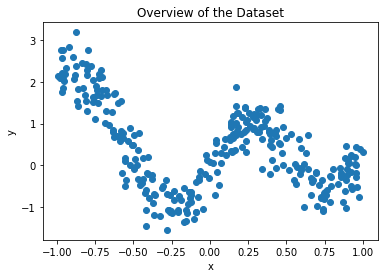

In [29]:
import matplotlib.pyplot as plt

# Plotting Data
plt.scatter(x=data["x"], y=data["y"])
plt.title("Overview of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.plot()

# Shuffling Needed?

[]

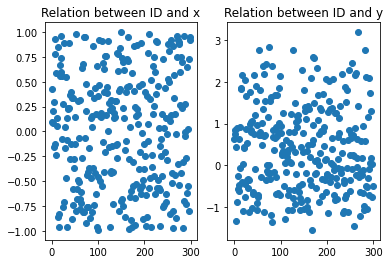

In [59]:
# Checking the realation of ID and features

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(x=range(300), y=data["x"])
ax[0].set_title("Relation between ID and x")

ax[1].scatter(x=range(300), y=data["y"])
ax[1].set_title("Relation between ID and y")

plt.plot()

[]

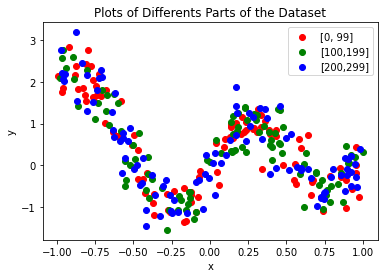

In [60]:
# Checking plots of differents parts of the dataset
plt.scatter(x=data["x"][:100], y=data["y"][:100], color="red", label="[0, 99]")
plt.scatter(x=data["x"][100:200], y=data["y"][100:200], color="green", label="[100,199]")
plt.scatter(x=data["x"][200:], y=data["y"][200:], color="blue", label="[200,299]")
plt.title("Plots of Differents Parts of the Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.plot()

# Train and Test Split

In [61]:
data_train = data.head(240)
data_test = data.tail(60)

# Gradient Descent

In [85]:
lr = 0.01 # Learning Rate
number_epoch = 10 # Number of required epochs
dimensions = 5 # Number of dimensions
c = np.zeros(dimensions) # Coefficients of polynomial: c[n]*(x**n) + ... + c[2]*(x**2) + c[1]*(x) + c[0]

In [95]:
def single_polynomial(c, x):
    sum = 0
    for i, ci in enumerate(c):
        sum += ci * (x**i)

    return sum

In [96]:
def polynomial(c, x):
    return np.array([single_polynomial(c, xi) for xi in x])

In [87]:
x_train = data_train["x"].values
y_train = data_train["y"].values

In [106]:
def mse(y_predict, y_train):
    n = len(y_predict)
    sum = 0
    for i in range(n):
        sum += (y_predict[i]-y_train[i])**2
    
    return sum

In [100]:
def partial_mse(y_predict, y_train, x_train, c, dimension):
    n = len(x_train)
    sum = 0
    for i in range(n):
        sum +=  x_train[i]**dimension * (y_train[i] - y_predict[i])
    return -2/n*sum

In [101]:
c_new = np.array()

for i, ci in enumerate(c):
    y_predict = polynomial(c, x_train)
    ci_new = ci - lr * partial_mse(y_predict, y_train, x_train, c, i)
    c_new.append(ci_new)

c = c_new

In [103]:
c_new

array([0., 0., 0., 0., 0.])

In [108]:
c = np.zeros(dimensions)
for epoch in range(number_epoch):
    c_new = []
    y_predict = polynomial(c, x_train)
    print(f"epoch = {epoch}")
    print(mse(y_predict, y_train))
    for i, ci in enumerate(c):
        ci_new = ci - lr * partial_mse(y_predict, y_train, x_train, c, i)
        c_new.append(ci_new)

    c = np.array(c_new)

epoch = 0
283.6451486152497
epoch = 1
279.9838514853856
epoch = 2
276.45755877829134
epoch = 3
273.06058560125956
epoch = 4
269.7874993626941
epoch = 5
266.6331083358297
epoch = 6
263.59245074514854
epoch = 7
260.6607843515245
epoch = 8
257.8335765132286
epoch = 9
255.10649470098096
epoch = 10
252.47539744623157
epoch = 11
249.9363257028134
epoch = 12
247.48549460301746
epoch = 13
245.1192855900125
epoch = 14
242.8342389093625
epoch = 15
240.62704644318225
epoch = 16
238.49454487123313
epoch = 17
236.43370914397659
epoch = 18
234.44164625329228
epoch = 19
232.51558928722505
epoch = 20
230.6528917557484
epoch = 21
228.85102217513034
epoch = 22
227.10755889905835
epoch = 23
225.4201851852226
epoch = 24
223.78668448657288
epoch = 25
222.2049359569643
epoch = 26
220.67291016137537
epoch = 27
219.18866498133352
epoch = 28
217.75034170661064
epoch = 29
216.35616130466835
epoch = 30
215.0044208597111
epoch = 31
213.6934901735927
epoch = 32
212.42180852116707
epoch = 33
211.1878815530204
epoch

epoch = 411
145.61220772694597
epoch = 412
145.5768428640484
epoch = 413
145.54155616600866
epoch = 414
145.50634714729065
epoch = 415
145.47121532746644
epoch = 416
145.4361602311465
epoch = 417
145.4011813879069
epoch = 418
145.3662783322194
epoch = 419
145.33145060338353
epoch = 420
145.29669774545837
epoch = 421
145.2620193071959
epoch = 422
145.2274148419753
epoch = 423
145.1928839077397
epoch = 424
145.15842606693099
epoch = 425
145.12404088642867
epoch = 426
145.08972793748853
epoch = 427
145.05548679568133
epoch = 428
145.0213170408345
epoch = 429
144.98721825697302
epoch = 430
144.95319003226234
epoch = 431
144.91923195895103
epoch = 432
144.8853436333163
epoch = 433
144.8515246556082
epoch = 434
144.81777462999642
epoch = 435
144.78409316451686
epoch = 436
144.75047987101976
epoch = 437
144.71693436511777
epoch = 438
144.68345626613615
epoch = 439
144.65004519706252
epoch = 440
144.61670078449873
epoch = 441
144.58342265861137
epoch = 442
144.55021045308584
epoch = 443
144.51

epoch = 726
136.9263721554692
epoch = 727
136.90400271775604
epoch = 728
136.88165617372684
epoch = 729
136.85933246528847
epoch = 730
136.83703153462804
epoch = 731
136.81475332421064
epoch = 732
136.79249777677853
epoch = 733
136.77026483534928
epoch = 734
136.74805444321336
epoch = 735
136.72586654393345
epoch = 736
136.70370108134267
epoch = 737
136.68155799954258
epoch = 738
136.65943724290207
epoch = 739
136.6373387560555
epoch = 740
136.61526248390152
epoch = 741
136.59320837160064
epoch = 742
136.5711763645749
epoch = 743
136.54916640850556
epoch = 744
136.52717844933144
epoch = 745
136.50521243324832
epoch = 746
136.4832683067066
epoch = 747
136.46134601641006
epoch = 748
136.4394455093143
epoch = 749
136.41756673262597
epoch = 750
136.39570963380018
epoch = 751
136.3738741605398
epoch = 752
136.352060260794
epoch = 753
136.33026788275671
epoch = 754
136.30849697486482
epoch = 755
136.28674748579772
epoch = 756
136.26501936447485
epoch = 757
136.24331256005516
epoch = 758
136.

130.81168510040374
epoch = 1041
130.79462109878116
epoch = 1042
130.77757004922407
epoch = 1043
130.76053193539553
epoch = 1044
130.74350674101132
epoch = 1045
130.72649444983878
epoch = 1046
130.7094950456967
epoch = 1047
130.69250851245553
epoch = 1048
130.67553483403643
epoch = 1049
130.65857399441168
epoch = 1050
130.641625977604
epoch = 1051
130.62469076768653
epoch = 1052
130.60776834878223
epoch = 1053
130.59085870506408
epoch = 1054
130.57396182075476
epoch = 1055
130.55707768012584
epoch = 1056
130.5402062674984
epoch = 1057
130.5233475672421
epoch = 1058
130.50650156377537
epoch = 1059
130.48966824156494
epoch = 1060
130.47284758512563
epoch = 1061
130.4560395790201
epoch = 1062
130.4392442078586
epoch = 1063
130.4224614562992
epoch = 1064
130.4056913090465
epoch = 1065
130.38893375085257
epoch = 1066
130.37218876651593
epoch = 1067
130.35545634088177
epoch = 1068
130.33873645884123
epoch = 1069
130.32202910533172
epoch = 1070
130.3053342653364
epoch = 1071
130.28865192388395

epoch = 1425
125.0791116381379
epoch = 1426
125.06615533032306
epoch = 1427
125.05320796602663
epoch = 1428
125.04026953823963
epoch = 1429
125.0273400399634
epoch = 1430
125.0144194642084
epoch = 1431
125.0015078039955
epoch = 1432
124.98860505235473
epoch = 1433
124.97571120232594
epoch = 1434
124.96282624695851
epoch = 1435
124.9499501793115
epoch = 1436
124.93708299245363
epoch = 1437
124.92422467946245
epoch = 1438
124.91137523342604
epoch = 1439
124.89853464744102
epoch = 1440
124.8857029146138
epoch = 1441
124.87288002806015
epoch = 1442
124.86006598090509
epoch = 1443
124.84726076628301
epoch = 1444
124.83446437733765
epoch = 1445
124.82167680722186
epoch = 1446
124.8088980490979
epoch = 1447
124.7961280961369
epoch = 1448
124.78336694151943
epoch = 1449
124.77061457843502
epoch = 1450
124.7578710000824
epoch = 1451
124.74513619966945
epoch = 1452
124.7324101704128
epoch = 1453
124.71969290553821
epoch = 1454
124.70698439828051
epoch = 1455
124.69428464188343
epoch = 1456
124.6

121.79879672032465
epoch = 1704
121.78808504181691
epoch = 1705
121.77738064653579
epoch = 1706
121.76668352932
epoch = 1707
121.75599368501335
epoch = 1708
121.7453111084634
epoch = 1709
121.73463579452311
epoch = 1710
121.72396773804958
epoch = 1711
121.71330693390446
epoch = 1712
121.7026533769541
epoch = 1713
121.69200706206951
epoch = 1714
121.68136798412593
epoch = 1715
121.67073613800356
epoch = 1716
121.66011151858685
epoch = 1717
121.64949412076476
epoch = 1718
121.63888393943091
epoch = 1719
121.6282809694833
epoch = 1720
121.61768520582457
epoch = 1721
121.60709664336164
epoch = 1722
121.59651527700612
epoch = 1723
121.58594110167384
epoch = 1724
121.57537411228544
epoch = 1725
121.56481430376584
epoch = 1726
121.55426167104426
epoch = 1727
121.54371620905448
epoch = 1728
121.53317791273486
epoch = 1729
121.522646777028
epoch = 1730
121.51212279688075
epoch = 1731
121.50160596724477
epoch = 1732
121.49109628307583
epoch = 1733
121.48059373933424
epoch = 1734
121.470098330984

epoch = 2020
118.74255019686392
epoch = 2021
118.73391007547009
epoch = 2022
118.72527579623909
epoch = 2023
118.71664735515743
epoch = 2024
118.70802474821436
epoch = 2025
118.69940797140241
epoch = 2026
118.69079702071659
epoch = 2027
118.68219189215542
epoch = 2028
118.67359258171977
epoch = 2029
118.66499908541378
epoch = 2030
118.65641139924439
epoch = 2031
118.64782951922147
epoch = 2032
118.63925344135767
epoch = 2033
118.63068316166861
epoch = 2034
118.62211867617293
epoch = 2035
118.61355998089212
epoch = 2036
118.60500707185044
epoch = 2037
118.59645994507524
epoch = 2038
118.58791859659644
epoch = 2039
118.57938302244725
epoch = 2040
118.57085321866354
epoch = 2041
118.56232918128389
epoch = 2042
118.55381090635014
epoch = 2043
118.54529838990689
epoch = 2044
118.53679162800124
epoch = 2045
118.52829061668368
epoch = 2046
118.51979535200722
epoch = 2047
118.5113058300279
epoch = 2048
118.50282204680457
epoch = 2049
118.49434399839885
epoch = 2050
118.4858716808754
epoch = 20

epoch = 2314
116.43800193825444
epoch = 2315
116.43091801275366
epoch = 2316
116.4238388647267
epoch = 2317
116.41676449091446
epoch = 2318
116.40969488806032
epoch = 2319
116.40263005290915
epoch = 2320
116.39556998220903
epoch = 2321
116.38851467270975
epoch = 2322
116.38146412116329
epoch = 2323
116.37441832432438
epoch = 2324
116.36737727894916
epoch = 2325
116.36034098179681
epoch = 2326
116.35330942962855
epoch = 2327
116.3462826192077
epoch = 2328
116.33926054729973
epoch = 2329
116.33224321067281
epoch = 2330
116.32523060609674
epoch = 2331
116.31822273034405
epoch = 2332
116.31121958018927
epoch = 2333
116.30422115240916
epoch = 2334
116.29722744378293
epoch = 2335
116.29023845109181
epoch = 2336
116.28325417111925
epoch = 2337
116.27627460065108
epoch = 2338
116.26929973647502
epoch = 2339
116.2623295753817
epoch = 2340
116.25536411416314
epoch = 2341
116.2484033496142
epoch = 2342
116.24144727853164
epoch = 2343
116.23449589771454
epoch = 2344
116.22754920396432
epoch = 2345

epoch = 2647
114.32434975419527
epoch = 2648
114.31868954285046
epoch = 2649
114.31303313895663
epoch = 2650
114.30738053992214
epoch = 2651
114.30173174315662
epoch = 2652
114.29608674607218
epoch = 2653
114.29044554608234
epoch = 2654
114.28480814060252
epoch = 2655
114.27917452704959
epoch = 2656
114.27354470284247
epoch = 2657
114.26791866540187
epoch = 2658
114.26229641215002
epoch = 2659
114.25667794051115
epoch = 2660
114.25106324791126
epoch = 2661
114.24545233177808
epoch = 2662
114.23984518954077
epoch = 2663
114.23424181863075
epoch = 2664
114.22864221648092
epoch = 2665
114.22304638052591
epoch = 2666
114.21745430820219
epoch = 2667
114.2118659969481
epoch = 2668
114.20628144420361
epoch = 2669
114.20070064741026
epoch = 2670
114.19512360401156
epoch = 2671
114.18955031145292
epoch = 2672
114.18398076718108
epoch = 2673
114.17841496864496
epoch = 2674
114.17285291329483
epoch = 2675
114.16729459858298
epoch = 2676
114.16174002196337
epoch = 2677
114.15618918089157
epoch = 2

epoch = 2957
112.73993952875078
epoch = 2958
112.73534376781888
epoch = 2959
112.73075109007105
epoch = 2960
112.72616149341029
epoch = 2961
112.72157497574085
epoch = 2962
112.71699153496895
epoch = 2963
112.71241116900147
epoch = 2964
112.7078338757475
epoch = 2965
112.7032596531168
epoch = 2966
112.69868849902113
epoch = 2967
112.69412041137343
epoch = 2968
112.6895553880882
epoch = 2969
112.68499342708117
epoch = 2970
112.68043452626958
epoch = 2971
112.6758786835722
epoch = 2972
112.6713258969089
epoch = 2973
112.66677616420164
epoch = 2974
112.66222948337273
epoch = 2975
112.6576858523471
epoch = 2976
112.65314526905026
epoch = 2977
112.6486077314095
epoch = 2978
112.64407323735317
epoch = 2979
112.63954178481153
epoch = 2980
112.63501337171584
epoch = 2981
112.63048799599906
epoch = 2982
112.62596565559537
epoch = 2983
112.62144634844034
epoch = 2984
112.61693007247128
epoch = 2985
112.6124168256263
epoch = 2986
112.60790660584559
epoch = 2987
112.60339941107034
epoch = 2988
112

epoch = 3304
111.31663132696713
epoch = 3305
111.31298886736275
epoch = 3306
111.30934884278818
epoch = 3307
111.30571125158826
epoch = 3308
111.30207609210927
epoch = 3309
111.29844336269855
epoch = 3310
111.29481306170443
epoch = 3311
111.29118518747644
epoch = 3312
111.28755973836522
epoch = 3313
111.28393671272282
epoch = 3314
111.28031610890196
epoch = 3315
111.27669792525677
epoch = 3316
111.27308216014228
epoch = 3317
111.26946881191513
epoch = 3318
111.26585787893237
epoch = 3319
111.26224935955251
epoch = 3320
111.25864325213558
epoch = 3321
111.25503955504209
epoch = 3322
111.25143826663387
epoch = 3323
111.24783938527405
epoch = 3324
111.24424290932676
epoch = 3325
111.24064883715714
epoch = 3326
111.23705716713165
epoch = 3327
111.2334678976177
epoch = 3328
111.22988102698388
epoch = 3329
111.22629655359982
epoch = 3330
111.22271447583637
epoch = 3331
111.21913479206543
epoch = 3332
111.21555750066011
epoch = 3333
111.21198259999443
epoch = 3334
111.20841008844367
epoch = 3

epoch = 3642
110.2141820036153
epoch = 3643
110.21127513334781
epoch = 3644
110.20837019835302
epoch = 3645
110.20546719731671
epoch = 3646
110.20256612892558
epoch = 3647
110.19966699186688
epoch = 3648
110.19676978482941
epoch = 3649
110.19387450650241
epoch = 3650
110.19098115557594
epoch = 3651
110.18808973074107
epoch = 3652
110.1852002306898
epoch = 3653
110.1823126541151
epoch = 3654
110.17942699971083
epoch = 3655
110.17654326617148
epoch = 3656
110.17366145219276
epoch = 3657
110.170781556471
epoch = 3658
110.16790357770333
epoch = 3659
110.16502751458847
epoch = 3660
110.16215336582502
epoch = 3661
110.15928113011341
epoch = 3662
110.15641080615417
epoch = 3663
110.15354239264917
epoch = 3664
110.15067588830111
epoch = 3665
110.14781129181354
epoch = 3666
110.14494860189083
epoch = 3667
110.14208781723825
epoch = 3668
110.1392289365619
epoch = 3669
110.13637195856924
epoch = 3670
110.13351688196767
epoch = 3671
110.13066370546639
epoch = 3672
110.12781242777508
epoch = 3673
1

epoch = 3948
109.40908250597269
epoch = 3949
109.40671052482337
epoch = 3950
109.4043401158384
epoch = 3951
109.40197127795132
epoch = 3952
109.39960401009574
epoch = 3953
109.39723831120651
epoch = 3954
109.39487418021906
epoch = 3955
109.39251161606953
epoch = 3956
109.39015061769467
epoch = 3957
109.38779118403195
epoch = 3958
109.38543331401988
epoch = 3959
109.38307700659732
epoch = 3960
109.38072226070412
epoch = 3961
109.37836907528063
epoch = 3962
109.37601744926812
epoch = 3963
109.3736673816085
epoch = 3964
109.37131887124426
epoch = 3965
109.368971917119
epoch = 3966
109.36662651817652
epoch = 3967
109.36428267336188
epoch = 3968
109.36194038162033
epoch = 3969
109.35959964189814
epoch = 3970
109.35726045314246
epoch = 3971
109.35492281430061
epoch = 3972
109.35258672432128
epoch = 3973
109.35025218215345
epoch = 3974
109.34791918674685
epoch = 3975
109.34558773705218
epoch = 3976
109.34325783202065
epoch = 3977
109.34092947060398
epoch = 3978
109.33860265175507
epoch = 3979

epoch = 4262
108.73636326133807
epoch = 4263
108.7344360434816
epoch = 4264
108.73251009613998
epoch = 4265
108.73058541845202
epoch = 4266
108.72866200955704
epoch = 4267
108.72673986859505
epoch = 4268
108.72481899470641
epoch = 4269
108.72289938703251
epoch = 4270
108.72098104471482
epoch = 4271
108.71906396689563
epoch = 4272
108.717148152718
epoch = 4273
108.71523360132521
epoch = 4274
108.71332031186141
epoch = 4275
108.71140828347107
epoch = 4276
108.70949751529956
epoch = 4277
108.70758800649261
epoch = 4278
108.70567975619655
epoch = 4279
108.70377276355832
epoch = 4280
108.70186702772556
epoch = 4281
108.69996254784631
epoch = 4282
108.69805932306919
epoch = 4283
108.69615735254365
epoch = 4284
108.69425663541935
epoch = 4285
108.69235717084689
epoch = 4286
108.69045895797717
epoch = 4287
108.68856199596185
epoch = 4288
108.68666628395295
epoch = 4289
108.68477182110348
epoch = 4290
108.68287860656656
epoch = 4291
108.68098663949615
epoch = 4292
108.67909591904659
epoch = 429

epoch = 4529
108.26432909740238
epoch = 4530
108.2627122846878
epoch = 4531
108.26109653217783
epoch = 4532
108.25948183915423
epoch = 4533
108.25786820489971
epoch = 4534
108.25625562869735
epoch = 4535
108.25464410983054
epoch = 4536
108.25303364758352
epoch = 4537
108.25142424124068
epoch = 4538
108.24981589008675
epoch = 4539
108.24820859340745
epoch = 4540
108.24660235048884
epoch = 4541
108.24499716061726
epoch = 4542
108.24339302307958
epoch = 4543
108.24178993716325
epoch = 4544
108.24018790215626
epoch = 4545
108.2385869173469
epoch = 4546
108.23698698202415
epoch = 4547
108.23538809547729
epoch = 4548
108.2337902569961
epoch = 4549
108.23219346587109
epoch = 4550
108.23059772139295
epoch = 4551
108.22900302285295
epoch = 4552
108.22740936954298
epoch = 4553
108.22581676075522
epoch = 4554
108.22422519578227
epoch = 4555
108.2226346739177
epoch = 4556
108.22104519445506
epoch = 4557
108.21945675668836
epoch = 4558
108.21786935991254
epoch = 4559
108.21628300342256
epoch = 4560

epoch = 4855
107.78952131381193
epoch = 4856
107.78821474550942
epoch = 4857
107.7869090274648
epoch = 4858
107.78560415910302
epoch = 4859
107.78430013984935
epoch = 4860
107.78299696912994
epoch = 4861
107.78169464637094
epoch = 4862
107.78039317099885
epoch = 4863
107.77909254244088
epoch = 4864
107.77779276012411
epoch = 4865
107.77649382347681
epoch = 4866
107.77519573192684
epoch = 4867
107.7738984849029
epoch = 4868
107.77260208183398
epoch = 4869
107.77130652214943
epoch = 4870
107.77001180527887
epoch = 4871
107.76871793065266
epoch = 4872
107.7674248977011
epoch = 4873
107.76613270585523
epoch = 4874
107.7648413545463
epoch = 4875
107.76355084320606
epoch = 4876
107.76226117126642
epoch = 4877
107.76097233816024
epoch = 4878
107.75968434331985
epoch = 4879
107.75839718617887
epoch = 4880
107.75711086617063
epoch = 4881
107.75582538272938
epoch = 4882
107.75454073528932
epoch = 4883
107.75325692328543
epoch = 4884
107.75197394615269
epoch = 4885
107.75069180332682
epoch = 4886

In [99]:
polynomial([0,1,2,3,4,5], np.array([0, 6,6]))

array([    0, 44790, 44790])